# AmirMohammad Babaei
# 9831011

## import libraries

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

%matplotlib inline

# Question 1


In [33]:
def get_time(index):
    return (index/600)*12 - 6

def calculate_ak(k, signal, period):
    ack = 0
    for i in range(period):
        ack += signal[i] * np.cos(k * ((2 * np.pi)/ period) * i)
    return ack/period

def calculate_bk(k, signal, period):
    ack = 0
    for i in range(period):
        ack += signal[i] * np.sin(k * ((2 * np.pi)/ period) * i)
    return ack/period

def fourier_series_k(signal, k, period):
    a_k = calculate_ak(k, signal, period) + calculate_bk(k, signal, period)/1j
    return a_k

def fourier_series(signal, period, start=0, end=10):
    serie = np.zeros(end - start + 1)
    for i in range(start, end+1):
        serie[i - start] = fourier_series_k(signal, i, period)
    return serie

def fourier_series_estimate(signal, period, start=0, end=10):
    if start == 0:
        output = np.ones(len(signal)) * calculate_ak(0, signal, period)
        for k in range(1, end+1):
            for i in range(len(signal)):
                output[i] += 2 * calculate_ak(k, signal, period) * np.cos(k * ((2*np.pi)/period) * i)
                output[i] += 2 * calculate_bk(k, signal, period) * np.sin(k * ((2*np.pi)/period) * i)
    else:
        output = np.zeros(len(signal))
        for k in range(start, end+1):
            for i in range(len(signal)):
                output[i] += 2 * calculate_ak(k, signal, period) * np.cos(k * ((2*np.pi)/period) * i)
                output[i] += 2 * calculate_bk(k, signal, period) * np.sin(k * ((2*np.pi)/period) * i)
    return output

In [34]:
def get_period(signal):
    from sys import maxsize
    minimum = min(signal)
    first_occurrence = maxsize
    second_occurrence = maxsize
    for time in range(len(signal)):
        if abs(signal[time] - minimum) < 0.01:
            if first_occurrence == maxsize: 
                first_occurrence = time
            else:
                second_occurrence = time
                break
    return second_occurrence - first_occurrence

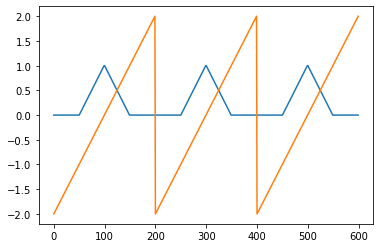

In [77]:
def create_first_signal():
    first_signal = np.append(np.zeros(50), np.linspace(0.0, 1.0))
    first_signal = np.append(first_signal, first_signal[::-1])
    first_signal = np.append(np.append(first_signal, first_signal), first_signal)
    plt.plot(range(len(first_signal)), first_signal)
    return first_signal

def create_second_signal():
    second_signal = np.linspace(-2.0, 2.0, num=200)
    second_signal = np.append(np.append(second_signal, second_signal), second_signal)
    plt.plot(range(len(second_signal)), second_signal)
    return second_signal
    
signal_1 = create_first_signal()
signal_2 = create_second_signal()

## a) approximate the original signal by bounded fourier series

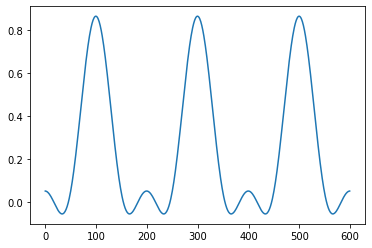

In [36]:
signal_1_0to2 = fourier_series_estimate(signal_1, 200, 0, 2)
plt.plot(range(len(signal_1_0to2)), signal_1_0to2)

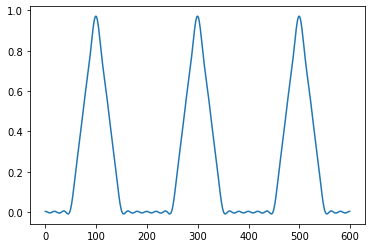

In [37]:
signal_1_0to10 = fourier_series_estimate(signal_1, 200, 0, 10)
plt.plot(range(len(signal_1_0to10)), signal_1_0to10)

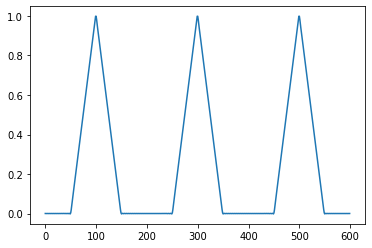

In [38]:
signal_1_0to50 = fourier_series_estimate(signal_1, 200, 0, 50)
plt.plot(range(len(signal_1_0to50)), signal_1_0to50)

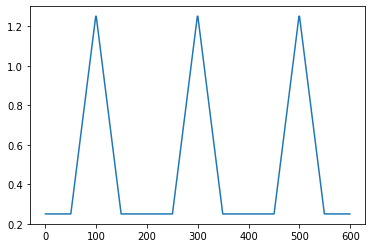

In [39]:
signal_1_100to200 = fourier_series_estimate(signal_1, 200, 100, 200)
plt.plot(range(len(signal_1_100to200)), signal_1_100to200)

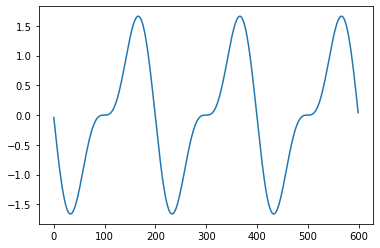

In [40]:
signal_2_0to2 = fourier_series_estimate(signal_2, 200, 0, 2)
plt.plot(range(len(signal_2_0to2)), signal_2_0to2)

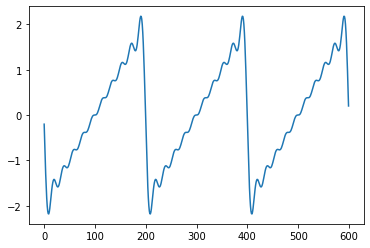

In [41]:
signal_2_0to10 = fourier_series_estimate(signal_2, 200, 0, 10)
plt.plot(range(len(signal_2_0to10)), signal_2_0to10)

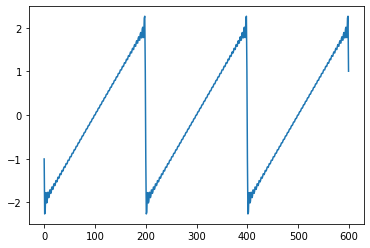

In [42]:
signal_2_0to50 = fourier_series_estimate(signal_2, 200, 0, 50)
plt.plot(range(len(signal_2_0to50)), signal_2_0to50)

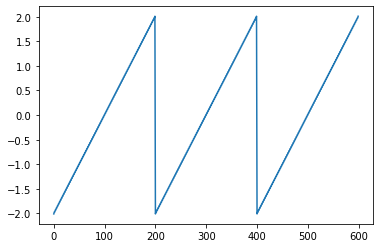

In [43]:
signal_2_100to200 = fourier_series_estimate(signal_2, 200, 100, 200)
plt.plot(range(len(signal_2_100to200)), signal_2_100to200)

## b) Which harmonics has the main effect in approximation?

/tmp/ipykernel_401/2873091158.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  serie[i - start] = fourier_series_k(signal, i, period)


<StemContainer object of 3 artists>

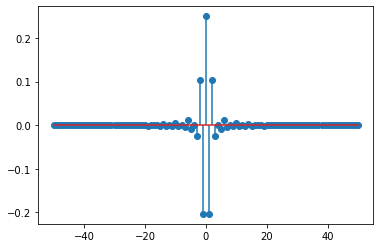

In [45]:
signal_1_fourier_series = fourier_series(signal_1, 200, -50, 50)
plt.stem(range(-50, -50 + len(signal_1_fourier_series)), signal_1_fourier_series)

the plot shows us, the main effect in the approximation is in low frequencies. Based on Parseval's relation, 
$$\frac{1}{T}\int_{T}|x(t)|^2dt = \sum_{k=-\infty}^{+\infty}|a_k|^2$$
so we can conclude low frequencies have been stored more amount of energy in themselves.

/tmp/ipykernel_401/2873091158.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  serie[i - start] = fourier_series_k(signal, i, period)


<StemContainer object of 3 artists>

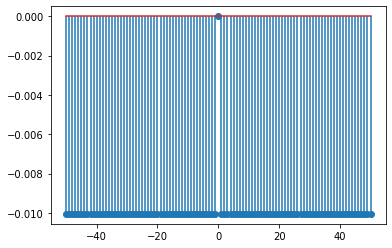

In [50]:
signal_2_fourier_series = fourier_series(signal_2, 200, -50, 50)
plt.stem(range(-50, -50 + len(signal_2_fourier_series)), signal_2_fourier_series)

the plot shows us, all frequecies have the same effect in the approximation. Based on Parseval's relation, 
$$\frac{1}{T}\int_{T}|x(t)|^2dt = \sum_{k=-\infty}^{+\infty}|a_k|^2$$
so we can conclude all frequencies have been stored the same amount of energy in themselves

# Question 2

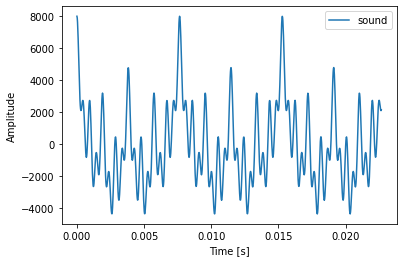

In [58]:
sample_rate, data = wavfile.read('./sound.wav')
length = data.shape[0] / sample_rate
time = np.linspace(0., length, data.shape[0])
plt.plot(time[:1000], data[:1000], label='sound')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

In [69]:
def fourier_series_k_frequency(signal, k, period):
    a_k = calculate_ak(k, signal, period) + calculate_bk(k, signal, period)
    return a_k

def fourier_series_frequency(signal, period, start=0, end=10):
    serie = np.zeros(end - start + 1)
    frequencies = np.zeros(end - start + 1)
    for i in range(start, end+1):
        serie[i - start] = fourier_series_k_frequency(signal, i, period)
        frequencies[i] = i * ((2 * np.pi)/6.116e-2)
    return serie, frequencies

<StemContainer object of 3 artists>

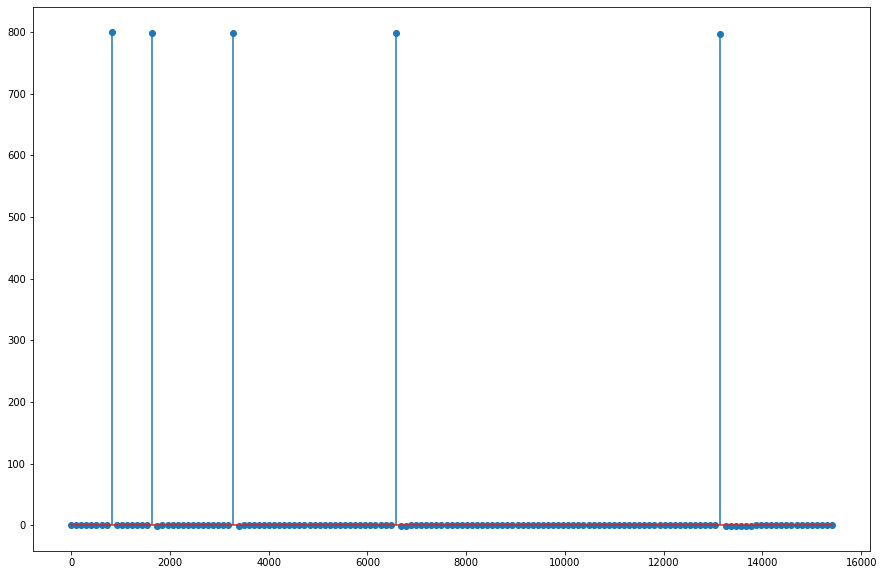

In [80]:
sound_frequency_signal, frequencies = fourier_series_frequency(data, int(sample_rate * 6.116e-2), 0, 150)
plt.figure(figsize=(15, 10))
plt.stem(frequencies, sound_frequency_signal)

In [99]:
frequency_list = frequencies[sound_frequency_signal > 5]
k_list = list(map(lambda x: (x * 6.116e-2) / (2 * np.pi), frequency_list))

print('list of frequencies that make the sound: ', frequency_list)
print('list of k that make the sound: ', k_list)

list of frequencies that make the sound:  [  821.86858171  1643.73716342  3287.47432684  6574.94865369
 13149.89730737]
list of k that make the sound:  [8.0, 16.0, 32.0, 64.0, 128.0]


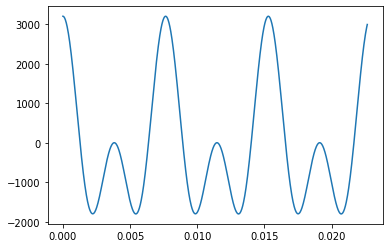

In [111]:
sound_period = int(sample_rate * 6.116e-2)
sound_signal_8_16 = np.zeros(sound_period)
for k in k_list[:2]:
    for i in range(sound_period):
        sound_signal_8_16[i] += 2 * calculate_ak(k, data[:sound_period], sound_period) * np.cos(k * ((2*np.pi)/sound_period) * i)
        sound_signal_8_16[i] += 2 * calculate_bk(k, data[:sound_period], sound_period) * np.sin(k * ((2*np.pi)/sound_period) * i)
plt.plot(time[:1000], sound_signal_8_16[:1000])

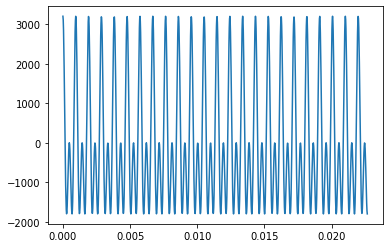

In [107]:
sound_signal_64_128 = np.zeros(sound_period)
for k in k_list[-2:]:
    for i in range(len(data)):
        sound_signal_64_128[i] += 2 * calculate_ak(k, data, sound_period) * np.cos(k * ((2*np.pi)/sound_period) * i)
        sound_signal_64_128[i] += 2 * calculate_bk(k, data, sound_period) * np.sin(k * ((2*np.pi)/sound_period) * i)
plt.plot(time[:1000], sound_signal_64_128[:1000])

In [109]:
wavfile.write('./sound_8_16.wav', sample_rate, sound_signal_8_16.astype(np.int16))
wavfile.write('./sound_64_128.wav', sample_rate, sound_signal_64_128.astype(np.int16))